<h1>DSCI 100 Project: Analysis of Facebook Posts’ Popularity and Interactions </h1>

<h2>Introduction</h2>

Facebook, one of the top social media platforms, allows all its users to post content onto their account/feed whenever and whatever they like. 
There are four post types a user can make:
<ol>
    <li>Link</li>
    <li>Photo</li>
    <li>Status</li>
    <li>Video</li> 
    </ol>
    

We are acting as social media managers/marketers who are trying to promote this cosmetic brand. We want to find what kind of posts bring in the most views and interactions (likes, comments, shares) to our Facebook page. More specifically, we will be investigating <b> which kind of post (link, photo, status, or video) is most popular and which day is the most popular to post?</b> 

<b>In answering the above question, we will begin a regression model to find, is the post performing well or underperforming? </b>

Our dataset is from the UCI Machine Learning Repository where it analyses 500 posts/pages with 19 variables. The data used originated from the Facebook metrics of a popular cosmetics brand. 
We can expect the relationship in our regression model to be positive as it is a given that as the number of views, consumers, and/or impressions increase, we will see that the total number of interactions will increase as well.


<b>Variables (19):</b>
<ul>
    
<li>Pages Total Likes</li>
<li>Type</li>
<li>Category</li>
<li>Post Month</li>
<li>Post Weekday</li>
<li>Post Hour</li>
<li>Paid</li>
<li>Lifetime Post Total Reach</li>
<li>Lifetime Post Total Impressions</li>
<li>Lifetime Engaged Users</li>
<li>Lifetime Post Consumers</li>
<li>Lifetime Post Consumption</li>
<li>Lifetime Post Impressions by people who have liked your page</li>
<li>Lifetime Post reach by people who like your Page</li>
<li>Lifetime People who have liked your Page and engaged with your post</li>
<li>Comment</li>
<li>Like</li>
<li>Share</li>
<li>Total Interactions</li>
    
</ul>

<h2>Methods & Results:</h2>

We want to filter out the posts by the most popular weekday to post. From that new dataset, we analyze the number of likes on the x-axis and the number of views on the y-axis. Based on this information, we want to know how successful each post type is based on its audience. We will base the success of each post by the total number of interactions (likes, comments, shares).
We scaled all predictors for regression. 

Lifetime Total Post Impressions is the number of times the post from our page is displayed on users’ feed, whether they were clicked or not.


>Loads the libraries and the data from the original source on the web.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dbplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
activity_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00368/Facebook_metrics.zip" #ICS Machine Learning Training set archive      
temp <- tempfile()                       #Vector of character strings to be used for naming temporary files, saved to temp.
download.file(activity_url, temp)        #Download Zip file from ICS archive, save into temp.
unzip(temp, "dataset_Facebook.csv")      #Unzip File.


fb_data <- read_delim("dataset_Facebook.csv",  #Read dataset and factor Type Column
                      ";") %>%                     
    mutate(Type = as.factor(Type))

# unlink(temp)                            #Delete Temporary Vector

Parsed with column specification:
cols(
  `Page total likes` = col_double(),
  Type = col_character(),
  Category = col_double(),
  `Post Month` = col_double(),
  `Post Weekday` = col_double(),
  `Post Hour` = col_double(),
  Paid = col_double(),
  `Lifetime Post Total Reach` = col_double(),
  `Lifetime Post Total Impressions` = col_double(),
  `Lifetime Engaged Users` = col_double(),
  `Lifetime Post Consumers` = col_double(),
  `Lifetime Post Consumptions` = col_double(),
  `Lifetime Post Impressions by people who have liked your Page` = col_double(),
  `Lifetime Post reach by people who like your Page` = col_double(),
  `Lifetime People who have liked your Page and engaged with your post` = col_double(),
  comment = col_double(),
  like = col_double(),
  share = col_double(),
  `Total Interactions` = col_double()
)




>The column names in the data are changes to exclude spaces and to replace them with "."
>The data is then wrangled and cleaned to include only relevant columns (Post.Weekday and Total.Interactions). These columns will be used for exploring the data.

In [3]:
#Tidying Data: Replace spaces in Column names with periods.
colnames(fb_data) <- make.names(colnames(fb_data))
    head(fb_data)

fb_data_eda <- fb_data %>%
    select(Type, Post.Weekday, Total.Interactions) 

Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,Lifetime.Post.Total.Reach,Lifetime.Post.Total.Impressions,Lifetime.Engaged.Users,Lifetime.Post.Consumers,Lifetime.Post.Consumptions,Lifetime.Post.Impressions.by.people.who.have.liked.your.Page,Lifetime.Post.reach.by.people.who.like.your.Page,Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post,comment,like,share,Total.Interactions
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186


>A visualization of the exploratory data analysis consisted of the weekday a post was posted and the total interactions it had. For the purposes of this section, interactions is defined as likes, comments, and shares. The visualization shows that Wednesday has the highest interaction count and that mainly photos are interacted with.

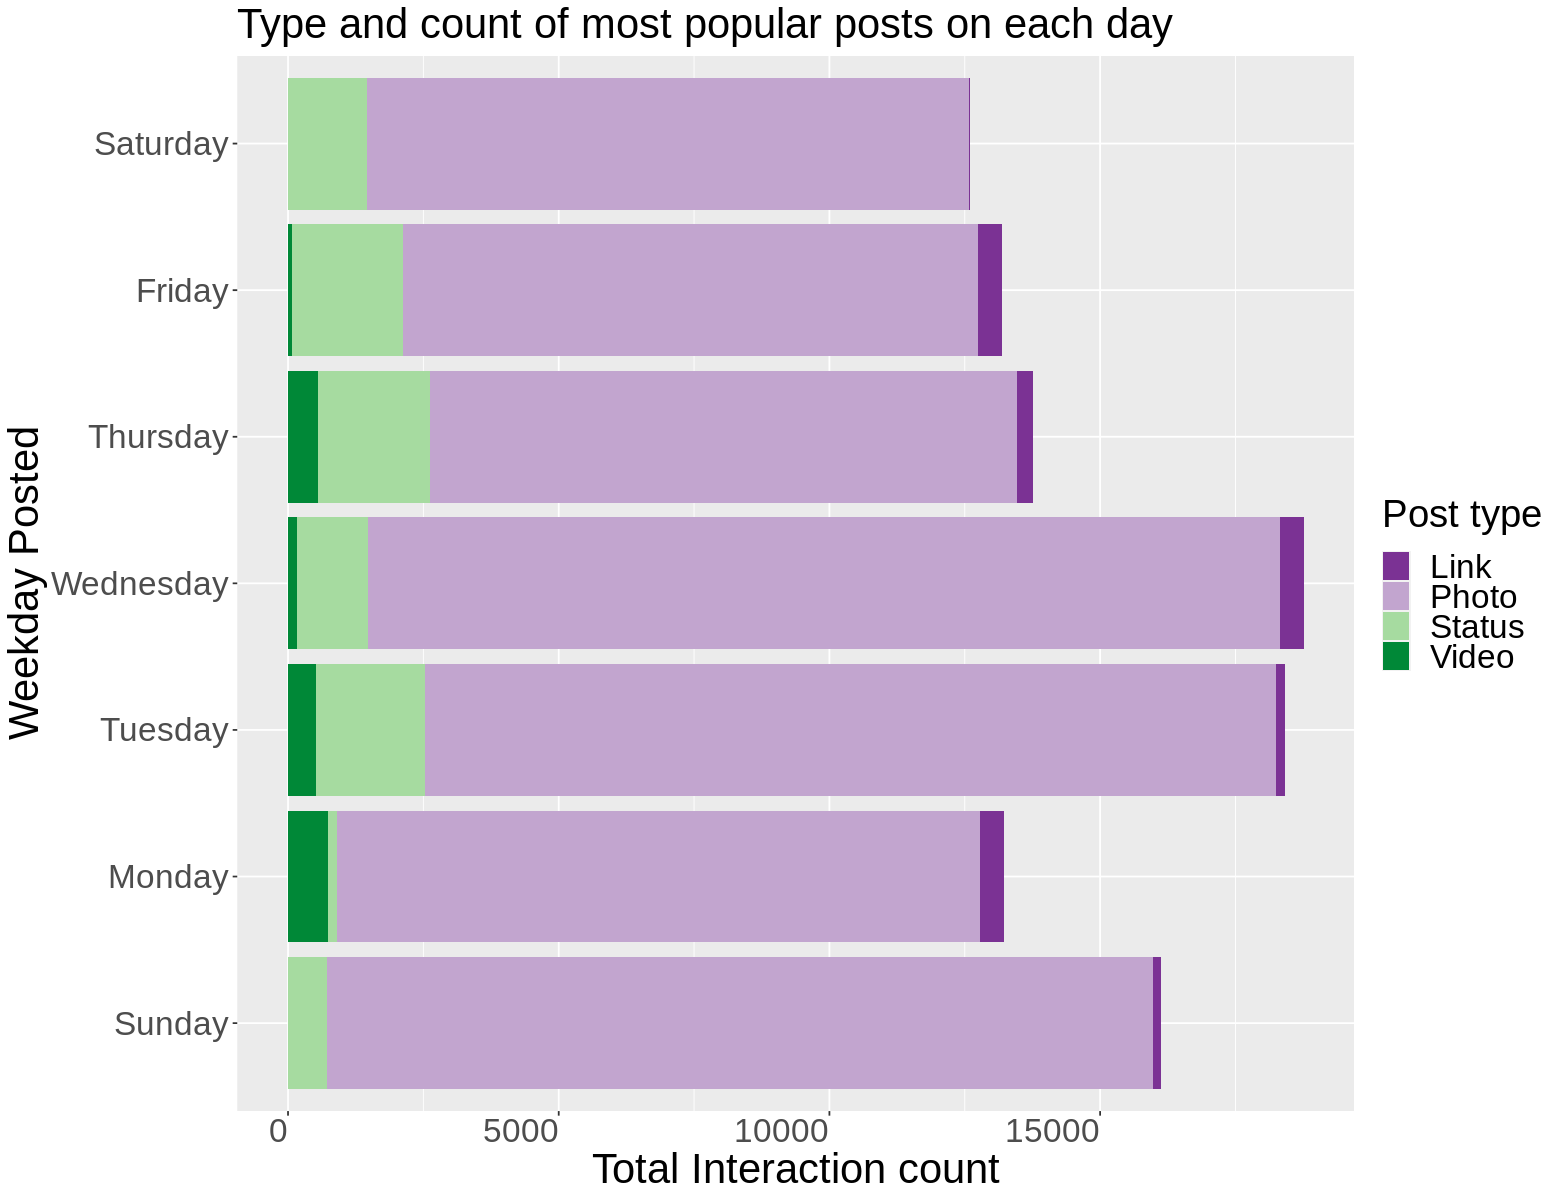

In [4]:
options(repr.plot.height = 10, repr.plot.width = 13)

most_interactions <- fb_data_eda %>%                                      #plot of interactions and post type vs day
    arrange(desc(Post.Weekday)) %>%
    ggplot(aes(x = Post.Weekday, 
                 y = Total.Interactions,                     
                 fill = Type)) + 
    geom_bar(stat = "identity") +                                     #graph titles
    xlab("Weekday Posted") +
    ylab("Total Interaction count") +
    labs(fill = "Post type") +
    ggtitle("Type and count of most popular posts on each day") +
    theme(axis.text = element_text(size = 20,                         #font sizes
                                    hjust = 1),
         plot.title = element_text(size = 25),
         axis.title = element_text(size = 25),
         legend.text = element_text(size = 20),
         legend.title = element_text(size = 23)) +
            scale_fill_brewer(palette = 'PRGn') +
 scale_x_discrete(limits=c("1", "2", "3", "4", "5", "6", "7"),
                  labels=c("1" = "Sunday",
                           "2" = "Monday",
                           "3" = "Tuesday",
                           "4" = "Wednesday",
                           "5" = "Thursday",
                           "6" = "Friday",
                           "7" = "Saturday" )) +
    coord_flip()
most_interactions

In [5]:
options(repr.plot.height = 10, repr.plot.width = 13)

fb_data <- fb_data %>%
    filter(Post.Weekday == "4") %>%
    select(Type, Lifetime.Post.Total.Impressions, like) ############

fb_recipe <- recipe(Lifetime.Post.Total.Impressions ~ like, ############
                    data = fb_data)

fb_recipe <- fb_recipe %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()

>Further analysis uses the amount of likes and the lifetime post total impressions. Impressions are the number of times a post is viewed, regardless if it is the same consumer. The visualization below shows that photos and links have the highest lifetime post toal impressions and likes.

<ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    expand: TRUE
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>

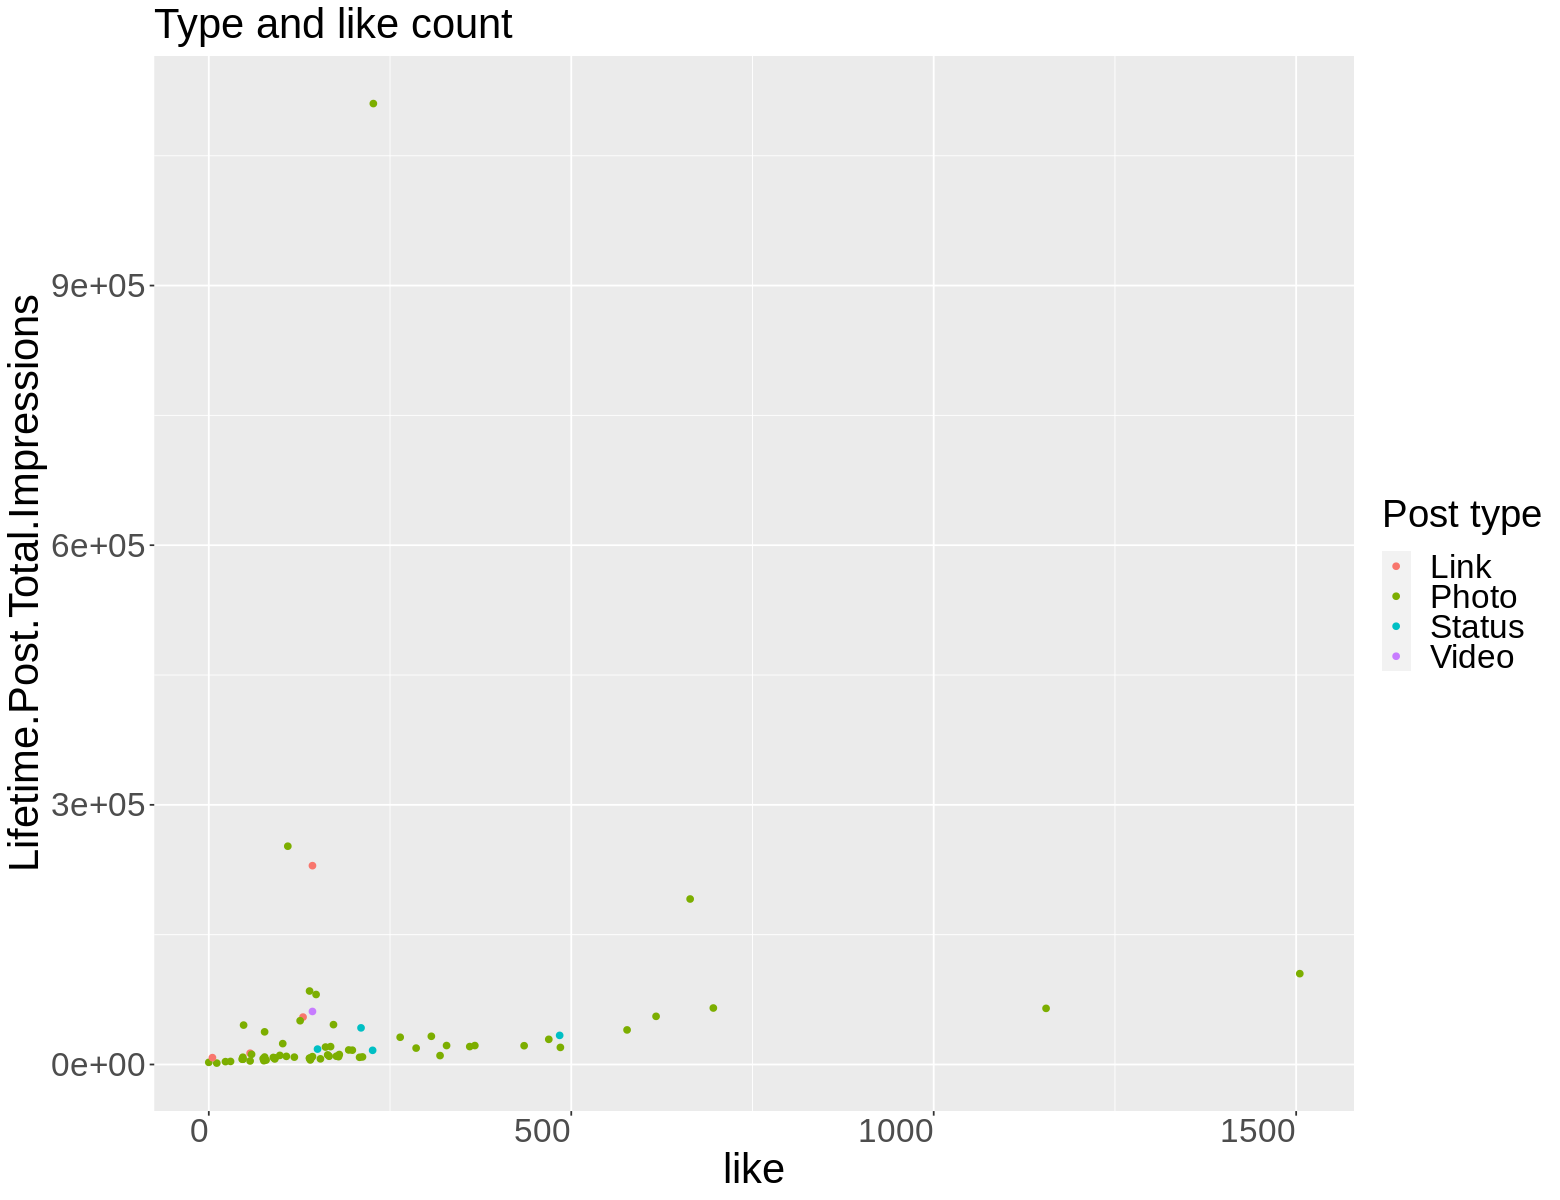

In [6]:
most_interactions <- fb_data %>%                                      #plot of interactions and post type vs day
    ggplot(aes(x = like, 
                 y = Lifetime.Post.Total.Impressions,                     
                 colour = Type)) + 
    geom_point() +                                     #graph titles
    ylab("Lifetime.Post.Total.Impressions") +
    xlab("like") +
    labs(colour = "Post type") +
    ggtitle("Type and like count") +
    theme(axis.text = element_text(size = 20,                         #font sizes
                                    hjust = 1),
         plot.title = element_text(size = 25),
         axis.title = element_text(size = 25),
         legend.text = element_text(size = 20),
         legend.title = element_text(size = 23)) +
            scale_fill_brewer(palette = 'PRGn') 
    coord_flip()
most_interactions

In [7]:
fb_split <- initial_split(fb_data,
                          prop = 0.75,
                          strata = Type)  #splitting data
fb_train <- training(fb_split)   
fb_test <- testing(fb_split)

head(fb_train)
head(fb_test)

Type,Lifetime.Post.Total.Impressions,like
<fct>,<dbl>,<dbl>
Photo,39941,577
Video,61262,143
Photo,9390,107
Link,13023,57
Photo,4372,76
Photo,84885,139


Type,Lifetime.Post.Total.Impressions,like
<fct>,<dbl>,<dbl>
Photo,5091,79
Photo,8387,47
Status,16362,226
Photo,104952,1505
Photo,19724,485
Photo,64850,1155


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         like  
   31667.89        63.46  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.035417e+04
rsq,standard,3.526539e-01
mae,standard,3.353299e+04


`geom_smooth()` using formula 'y ~ x'



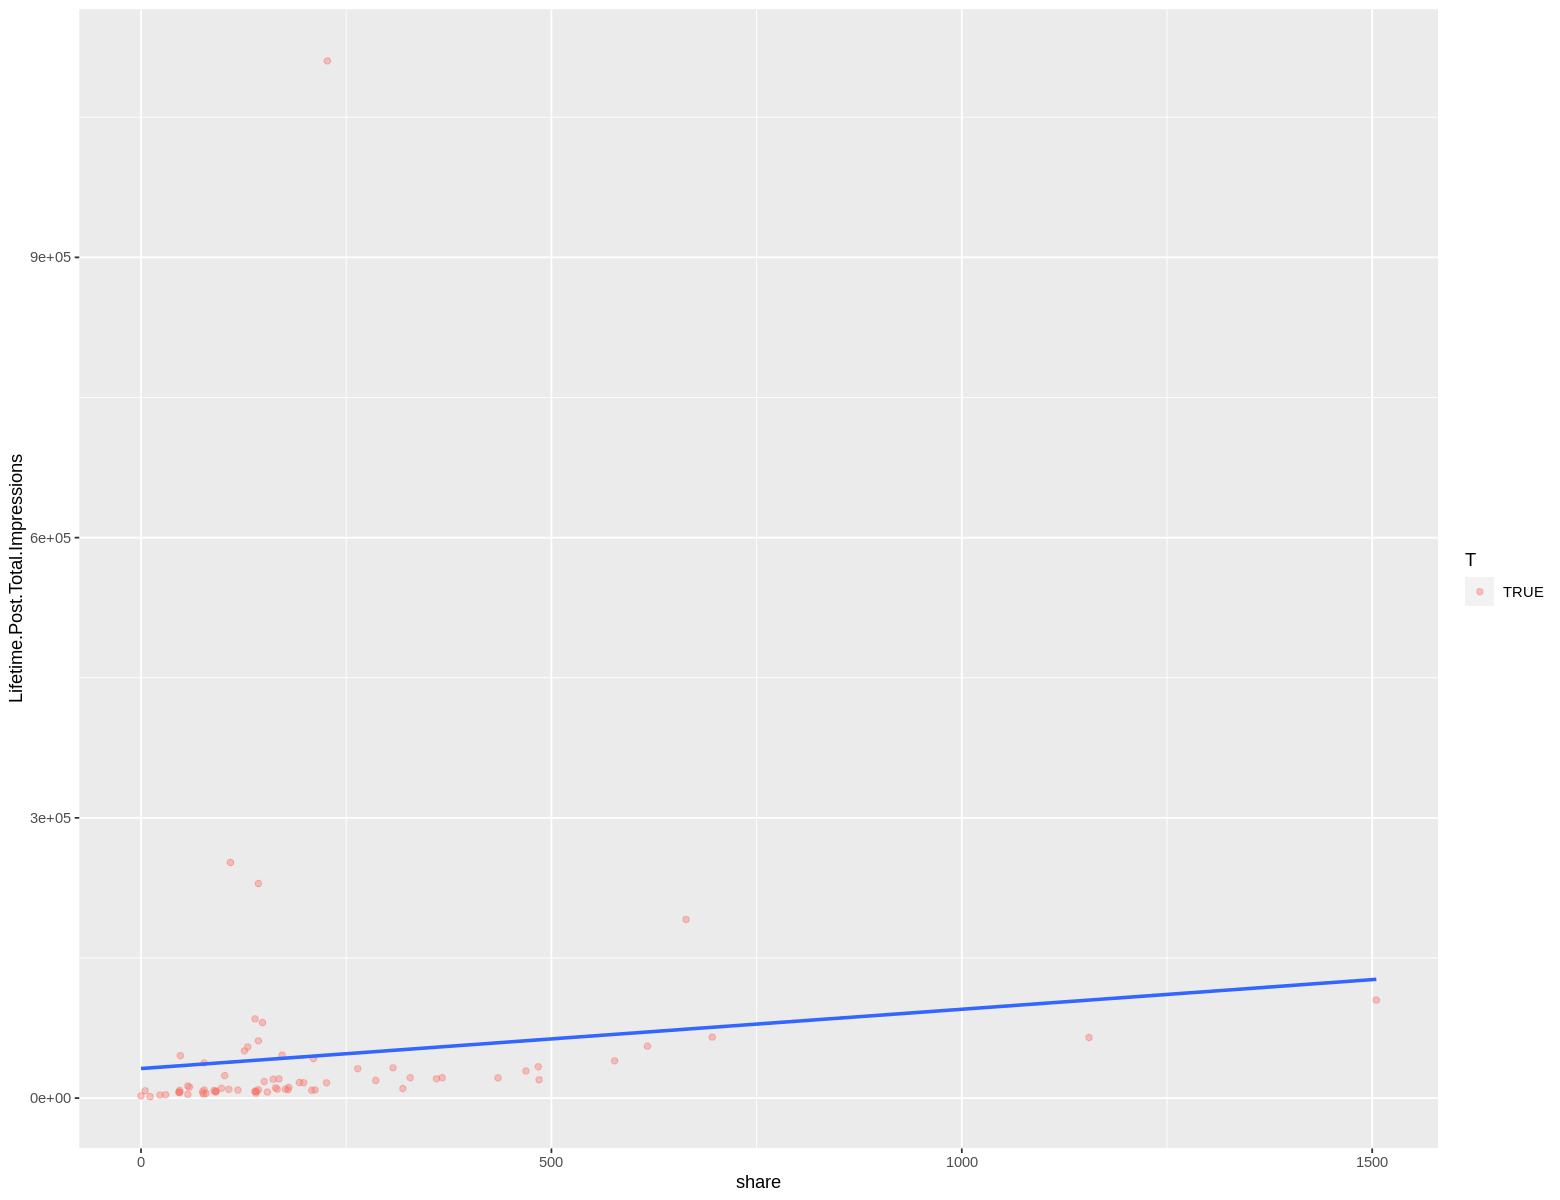

In [8]:
lm_spec <- linear_reg() %>%  
  set_engine("lm") %>%  
  set_mode("regression")

fb_recipe <- recipe(Lifetime.Post.Total.Impressions ~ like, ############
                    data = fb_data)

lm_fit <- workflow() %>%  
  add_recipe(fb_recipe) %>%  
  add_model(lm_spec) %>%  
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  fit(data = fb_data)
lm_fit

lm_test_results <- lm_fit %>%  
  predict(fb_test) %>%  
  bind_cols(fb_test) %>%  
  metrics(truth = Lifetime.Post.Total.Impressions,
          estimate = .pred)
lm_test_results

lm_plot_final <- ggplot(fb_data, aes(x = like,
                                     y = Lifetime.Post.Total.Impressions)) +
  geom_point(alpha = 0.4, aes(colour = T)) +
  xlab("share") +
  ylab("Lifetime.Post.Total.Impressions") +
  geom_smooth(method = "lm", se = FALSE)
lm_plot_final

For each

>creates a visualization of the analysis 
        note: all tables and figure should have a figure/table number and a legend

<h2>Discussion</h2>

By analyzing the data as a bar graph with the Weekday on the y-axis and the Total Interaction Count on the x-axis, with the bars being color-coded by the post type, we were able to find that the photo post type is the most popular with Wednesday being the most popular day to post on Facebook. There is no marginality between post types so we can be confident in the result of the post type and weekday. The results are what we’d expect to find, since the variables show a weak positive correlation, i.e the Number of LifeTime Post Impressions is expected to increase with Likes/ Shares.

When looking at the regression, we can see a majority of our posts, especially our photo posts, are performing well. From the model where the Lifetime Post Total Impressions is plotted against Likes, we can see that they have a weak positive relationship. We can receive two pieces of information from this graph. With the points that have a lot more impressions than likes, including the outliers, we could entail that our posts are appearing on people's feeds and/or the ads are working well to show up, however content wise, it does receive well enough with users. This can be an indication that most of these points with this kind of ratio are most likely Facebook ads that show up in people's feeds. Secondly, with the points basically below the line, we can see that the ratio between impressions and likes is in a good position where the post content wise is good and receives enough likes with the amount of people seeing our posts. These points would contain more of our non-adverts and just posts to our feed to update followers/users of our brand. 

These results give us an incentive to continue using picture posts as a way to promote the cosmetic brands’ Facebook page. We would also focus more of our resources on these kinds of posts such as Facebook ads, especially on Wednesday as it is the most popular day to post. We would also work on trying to find a way to increase consumption of our other post types.

<b> Further questions/discussions after results:</b>
<ul>
    <li> How much more of our product is being sold with the use of Facebook posts and ads?</li>
<li> Would we want to invest even more into marketing through picture posts or could we leave it where it's at, or even decrease funding there and more into other posts?</li>
<li>Is the statistics and results the same with other companies? If so, which type and why?</li>
<li>Is there any benefit in analyzing the second or even third most popular post type?</li>
</ul>
    


<h2>References</h2>

Moro, S., Rita, P., & Vala, B. (2016, February 28). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research. https://www.sciencedirect.com/science/article/abs/pii/S0148296316000813

Glossary of metrics - analytics - facebook. Help & Support. (n.d.). https://support.socialbakers.com/hc/en-us/articles/115007663707-Glossary-of-Metrics-Analytics-Facebook-

UCI machine Learning REPOSITORY: Facebook metrics data set. (n.d.). https://archive.ics.uci.edu/ml/datasets/Facebook+metrics


In [1]:
dfgdhdfhdfhd

ERROR: Error in eval(expr, envir, enclos): object 'dfgdhdfhdfhd' not found
